**Pytorch로 Logistic Regression 구현**

In [7]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr=1.0

for epoch in range(3001):
 W.requires_grad_(True)
 b.requires_grad_(True)
 
 hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
 cost = torch.mean(
 -y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis)
 )

 cost.backward()
 with torch.no_grad() as grd:
  W = W - lr * W.grad
  b = b - lr * b.grad

 if epoch % 300 == 0:
  print( 'epoch: {}, cost: {:.6f}, w:{:.6f}, b:{:.6f}'.format(epoch, cost.item(), W.squeeze(),b.squeeze()))

epoch: 0, cost: 0.693147, w:-0.154167, b:0.083333
epoch: 300, cost: 0.390820, w:-2.174322, b:6.609553
epoch: 600, cost: 0.383699, w:-2.620779, b:7.953164
epoch: 900, cost: 0.382149, w:-2.832521, b:8.587363
epoch: 1200, cost: 0.381706, w:-2.946401, b:8.927779
epoch: 1500, cost: 0.381565, w:-3.010968, b:9.120598
epoch: 1800, cost: 0.381517, w:-3.048561, b:9.232802
epoch: 2100, cost: 0.381500, w:-3.070765, b:9.299053
epoch: 2400, cost: 0.381494, w:-3.083991, b:9.338510
epoch: 2700, cost: 0.381492, w:-3.091908, b:9.362126
epoch: 3000, cost: 0.381491, w:-3.096662, b:9.376306


In [5]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


**여러가지 optimizer 사용해보기**

In [8]:
#SGD 사용
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

optimizer = torch.optim.SGD([W,b], lr=1.0)

for epoch in range(3001):
 W.requires_grad_(True)
 b.requires_grad_(True)
 
 hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
 cost = torch.mean(
 -y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis)
 )

 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 if epoch % 300 == 0:
  print( 'epoch: {}, cost: {:.6f}, w:{:.6f}, b:{:.6f}'.format(epoch, cost.item(), W.squeeze(),b.squeeze()))

epoch: 0, cost: 0.693147, w:-0.154167, b:0.083333
epoch: 300, cost: 0.390820, w:-2.174322, b:6.609553
epoch: 600, cost: 0.383699, w:-2.620779, b:7.953164
epoch: 900, cost: 0.382149, w:-2.832521, b:8.587363
epoch: 1200, cost: 0.381706, w:-2.946401, b:8.927779
epoch: 1500, cost: 0.381565, w:-3.010968, b:9.120598
epoch: 1800, cost: 0.381517, w:-3.048561, b:9.232802
epoch: 2100, cost: 0.381500, w:-3.070765, b:9.299053
epoch: 2400, cost: 0.381494, w:-3.083991, b:9.338510
epoch: 2700, cost: 0.381492, w:-3.091908, b:9.362126
epoch: 3000, cost: 0.381491, w:-3.096662, b:9.376306


In [9]:
#Adam 사용
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

optimizer = torch.optim.Adam([W,b], lr=1.0)

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
 
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
  -y_train * torch.log(hypothesis)
  -(1 - y_train) * torch.log(1 - hypothesis)
  )

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 300 == 0:
    print( 'epoch: {}, cost: {:.6f}, w:{:.6f}, b:{:.6f}'.format(epoch, cost.item(), W.squeeze(),b.squeeze()))

epoch: 0, cost: 0.693147, w:-1.000000, b:1.000000
epoch: 300, cost: 0.381491, w:-3.103857, b:9.397765
epoch: 600, cost: 0.381491, w:-3.103853, b:9.397752
epoch: 900, cost: 0.381491, w:-3.103853, b:9.397752
epoch: 1200, cost: 0.381491, w:-3.103853, b:9.397752
epoch: 1500, cost: 0.381491, w:-3.103853, b:9.397752
epoch: 1800, cost: 0.381491, w:-3.103931, b:9.401423
epoch: 2100, cost: 0.381491, w:-3.103853, b:9.397754
epoch: 2400, cost: 0.381491, w:-3.103853, b:9.397753
epoch: 2700, cost: 0.381491, w:-3.103853, b:9.397753
epoch: 3000, cost: 0.381491, w:-3.103853, b:9.397752


In [10]:
#Adadelta 사용
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

optimizer = torch.optim.Adadelta([W,b])

for epoch in range(3001):
 W.requires_grad_(True)
 b.requires_grad_(True)
 
 hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
 cost = torch.mean(
 -y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis)
 )

 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 if epoch % 300 == 0:
  print( 'epoch: {}, cost: {:.6f}, w:{:.6f}, b:{:.6f}'.format(epoch, cost.item(), W.squeeze(),b.squeeze()))

epoch: 0, cost: 0.693147, w:-0.003162, b:0.003160
epoch: 300, cost: 0.537192, w:-0.537830, b:1.522116
epoch: 600, cost: 0.458038, w:-1.015019, b:3.038627
epoch: 900, cost: 0.417649, w:-1.490835, b:4.520365
epoch: 1200, cost: 0.396584, w:-1.962220, b:5.964028
epoch: 1500, cost: 0.386648, w:-2.389365, b:7.257202
epoch: 1800, cost: 0.382993, w:-2.701013, b:8.193676
epoch: 2100, cost: 0.381953, w:-2.875364, b:8.715486
epoch: 2400, cost: 0.381644, w:-2.970553, b:8.999921
epoch: 2700, cost: 0.381544, w:-3.024969, b:9.162389
epoch: 3000, cost: 0.381510, w:-3.056807, b:9.257407


In [11]:
#Adagrad 사용
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

optimizer = torch.optim.Adagrad([W,b])

for epoch in range(3001):
 W.requires_grad_(True)
 b.requires_grad_(True)
 
 hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
 cost = torch.mean(
 -y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis)
 )

 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 if epoch % 300 == 0:
  print( 'epoch: {}, cost: {:.6f}, w:{:.6f}, b:{:.6f}'.format(epoch, cost.item(), W.squeeze(),b.squeeze()))

epoch: 0, cost: 0.693147, w:-0.010000, b:0.010000
epoch: 300, cost: 0.645402, w:-0.170435, b:0.345706
epoch: 600, cost: 0.629598, w:-0.214993, b:0.485882
epoch: 900, cost: 0.618306, w:-0.247934, b:0.590929
epoch: 1200, cost: 0.609294, w:-0.275112, b:0.678000
epoch: 1500, cost: 0.601714, w:-0.298676, b:0.753654
epoch: 1800, cost: 0.595136, w:-0.319701, b:0.821231
epoch: 2100, cost: 0.589307, w:-0.338818, b:0.882707
epoch: 2400, cost: 0.584064, w:-0.356431, b:0.939364
epoch: 2700, cost: 0.579294, w:-0.372822, b:0.992093
epoch: 3000, cost: 0.574915, w:-0.388193, b:1.041539


In [12]:
#RMSprop
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

optimizer = torch.optim.RMSprop([W,b])

for epoch in range(3001):
 W.requires_grad_(True)
 b.requires_grad_(True)
 
 hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
 cost = torch.mean(
 -y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis)
 )

 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 if epoch % 300 == 0:
  print( 'epoch: {}, cost: {:.6f}, w:{:.6f}, b:{:.6f}'.format(epoch, cost.item(), W.squeeze(),b.squeeze()))

epoch: 0, cost: 0.693147, w:-0.100000, b:0.100000
epoch: 300, cost: 0.444874, w:-1.143202, b:3.429768
epoch: 600, cost: 0.402613, w:-1.803058, b:5.454574
epoch: 900, cost: 0.386319, w:-2.417708, b:7.325363
epoch: 1200, cost: 0.381972, w:-2.881316, b:8.716043
epoch: 1500, cost: 0.381534, w:-3.062076, b:9.253578
epoch: 1800, cost: 0.381516, w:-3.100250, b:9.367140
epoch: 2100, cost: 0.381516, w:-3.107428, b:9.388515
epoch: 2400, cost: 0.381516, w:-3.108773, b:9.392519
epoch: 2700, cost: 0.381516, w:-3.109025, b:9.393265
epoch: 3000, cost: 0.381516, w:-3.109075, b:9.393414


**Matplotlib로 결과 시각화**

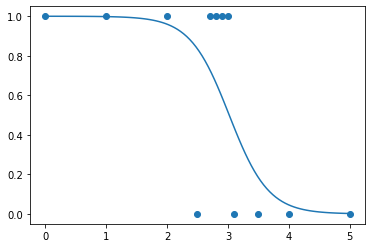

In [14]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y)
plt.show()

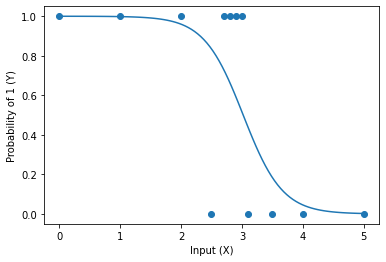

In [17]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.plot(X,Y)
plt.show()

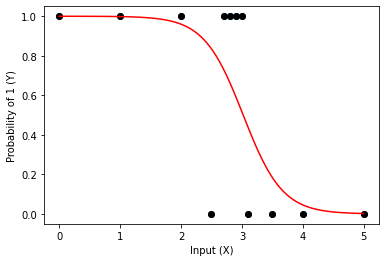

In [19]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c = 'black')
plt.plot(X,Y, c = "#ff0000")
plt.show()

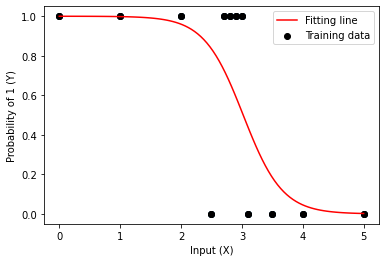

In [20]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c = 'black')
plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X,Y, c="#ff0000", label="Fitting line")
plt.legend()
plt.show()

**Logistic Regression with sklearn**

In [22]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!

model = LogisticRegression(penalty='none') # penalty (or regularization)은 추후 설명
model.fit(x_train, y_train)

#W와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)

# 새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
